In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../src/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import json
import os
from pathlib import Path

## HisDB

In [77]:
import experiment.data as exp
import datasets.divahisdb as hisdb
env = exp.Environment()
img_path = Path('../../doc/figures/img/')

In [18]:
dataset = hisdb.HisDBDataset(env.dataset(exp.Datasets.diva.value))
samples = [dataset[2], dataset[22], dataset[42]]

In [36]:
scale = 0.2
xpos, ypos, size = 600,1200, 600 
box = (xpos,ypos,xpos+size,ypos+size)
for idx, img in enumerate(samples):
    fig = img.resize((int(img.width * scale), int(img.height * scale)))
    name = figures / 'datasets' / ('HisDBSample' + str(idx) + '.jpeg')
    cropped = figures / 'datasets' / ('HisDBSampleBox' + str(idx) + '.jpeg')
    fig.save(name.open('wb'))
    img.crop(box).save(cropped.open('wb'))
    print(name, cropped)

/home/jakob/htw/imi-master-thesis/doc/figures/datasets/HisDBSample0.jpeg /home/jakob/htw/imi-master-thesis/doc/figures/datasets/HisDBSampleBox0.jpeg
/home/jakob/htw/imi-master-thesis/doc/figures/datasets/HisDBSample1.jpeg /home/jakob/htw/imi-master-thesis/doc/figures/datasets/HisDBSampleBox1.jpeg
/home/jakob/htw/imi-master-thesis/doc/figures/datasets/HisDBSample2.jpeg /home/jakob/htw/imi-master-thesis/doc/figures/datasets/HisDBSampleBox2.jpeg


## HisDB Processed

In [80]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import skimage.io
import skimage.segmentation as seg
from skimage.util import img_as_float, img_as_ubyte

In [81]:
import numpy as np

In [82]:
split = hisdb.Splits.training.value
dataset = Processed(env.dataset(exp.Datasets.processd.value), split=split, load=['img', 'slic', 'tiles', 'y', 'meta'])

In [83]:
i = 0
img, slic, tiles, y, meta = dataset[i]

In [84]:
marked = Image.fromarray(img_as_ubyte(np.array(seg.mark_boundaries(img, slic,color=(1,0,0)))))
p = 300
box = (p,p,p+500,p+500)
marked.crop(box=box).save(img_path / 'mark_boundaries.jpg')
# !pwd

/home/jakob/miniconda3/envs/master/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


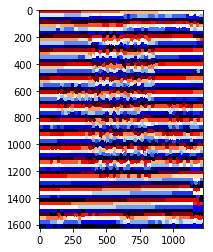

In [85]:
plt.imshow(slic,cmap='flag')

In [86]:
colored = np.zeros(slic.shape,dtype=np.int)
for idx in range(len(y)):
    tile_id = slic[meta[idx][0],meta[idx][1]]
    gt = y[idx]
    colored[np.where(slic == tile_id)] = hisdb.LABEL_DICT[gt]

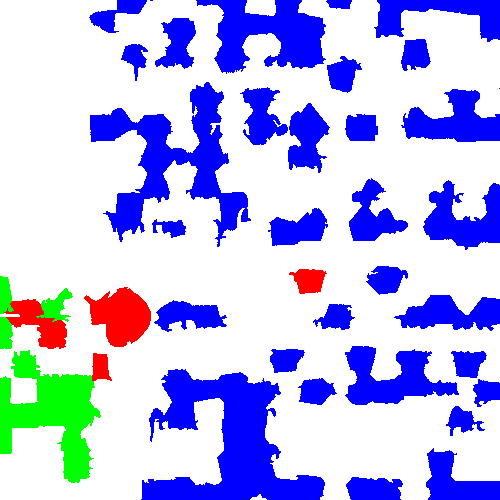

In [87]:
col_img = Image.fromarray(hisdb.color_gt(colored)).crop(box)
col_img.save(img_path/'colored_slic.jpg')
col_img